# 서울시 청소년 정신건강 통계분석
- 
- https://data.seoul.go.kr/dataList/10956/S/2/datasetView.do

In [1]:
# !dir 현재 내 위치 확인 가능

In [2]:
import pandas as pd
file_path1 = 'ref/청소년정신건강2024.csv'
file_path2 = 'ref/청소년정신건강2023.csv'
ori = pd.read_csv(file_path1)
ori0 = pd.read_csv(file_path2)

In [3]:
# ori = ori.loc[:,'스트레스 인지율':]
# ori.loc[2] = 100 - ori.loc[1,'스트레스 인지율':].astype(float)
#컬럼명
new_name = ['시점','스트레스','스트레스남학생','스트레스여학생','우울감경험률','우울남학생','우울여학생','자살생각율','자살남학생','자살여학생']
ori.columns = new_name
ori0.columns = new_name

In [4]:
# 시점을 없애고, 0번행도 없앰.
ori =ori.loc[1:,'스트레스':]
ori0 = ori0.loc[1:,'스트레스':]

In [5]:
# 2번 인덱스 행을 생성, 100에서 값을 뺀 값
ori.loc[2] = 100 -ori.loc[1,'스트레스':].astype(float)
# 마지막에 응답컬럼을 생성, 그렇다 or 아니다.
ori['응답'] = ['그렇다','아니다']

ori0.loc[2] = 100 - ori0.loc[1,'스트레스':].astype(float)
ori0['응답'] = ['그렇다','아니다']


In [6]:
ori = ori.set_index('응답')
ori0 = ori0.set_index('응답')

In [1]:
# os에 사용가능한, 설치된 폰트를 나열
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm
fontlist = fm.findSystemFonts(fontpaths=None, fontext = 'ttf')
# fontlist

Text(0.2, 0.3, '한글')

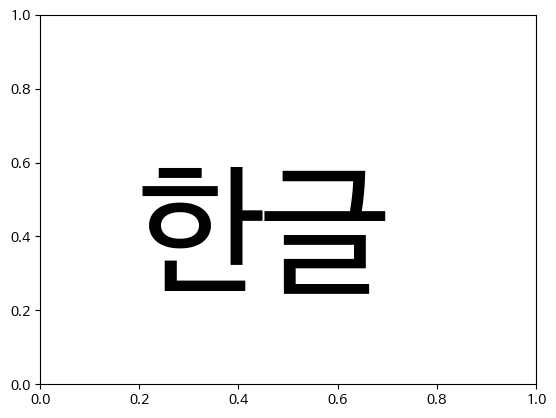

In [2]:
#윈도우용 폰트 경로 설정
# path = 'C:\\Windows\\Fonts\\NanumGothicLight.otf'
# font_name = fm.FontProperties(fname=path).get_name()
# rc('font',family = font_name)
# plt.text(0.3,0.3,'한글',size=100)

#리눅스용 폰트 경로 설정
plt.rc('font',family="NanumBarunGothic")
plt.text(0.2,0.3,'한글',size=100)

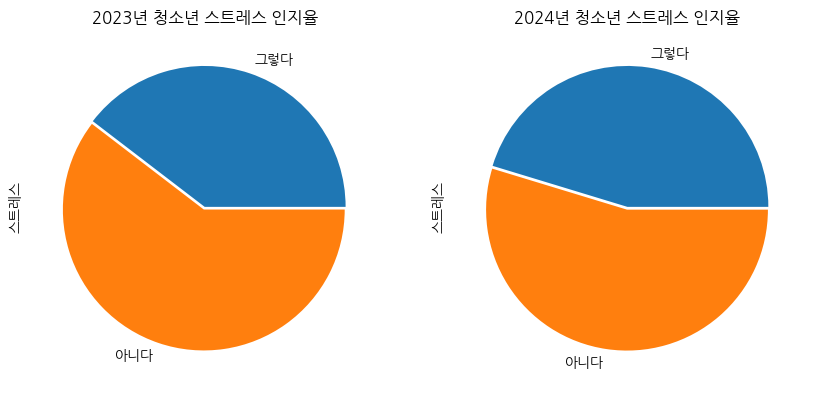

In [9]:
fig, ax = plt.subplots(1,2,figsize=(10,8))
ori['스트레스'].astype(float).plot.pie(explode = [0,0.02],ax=ax[1],title ='2024년 청소년 스트레스 인지율')
ori0['스트레스'].astype(float).plot.pie(explode = [0,0.02],ax=ax[0],title = '2023년 청소년 스트레스 인지율')
plt.show()

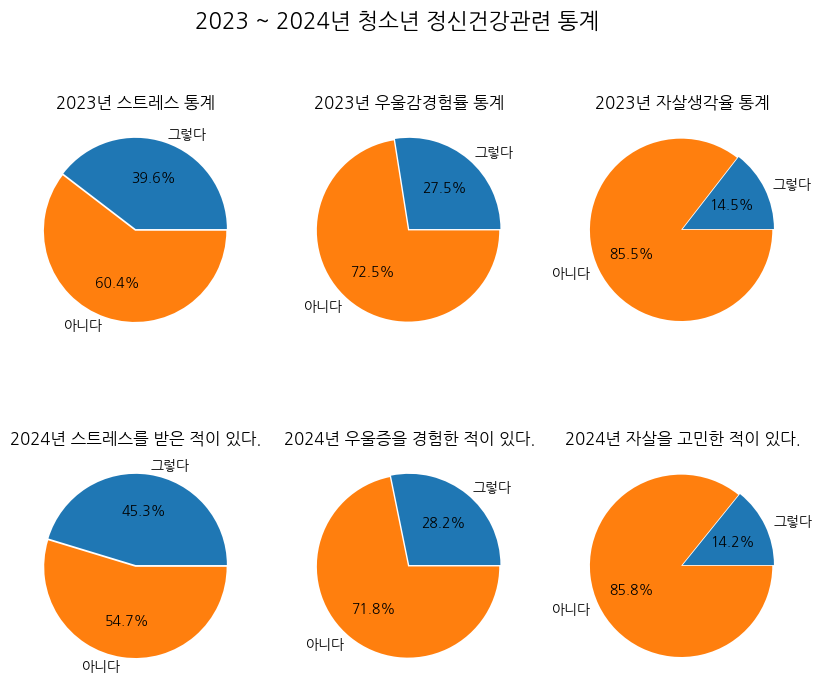

In [10]:
fig , ax = plt.subplots(2,3,figsize = (10,8))
obj = ['스트레스','우울감경험률','자살생각율']
for i,j in enumerate(obj):
    ori0[j].astype(float).plot.pie(explode = [0,0.02], ax =ax[0][i],autopct='%.1f%%')
    ax[0][i].set_title(f"2023년 {j} 통계")
    ax[0][i].set_ylabel('')
    
ori['스트레스'].astype(float).plot.pie(explode = [0,0.02], ax=ax[1][0], autopct="%.1f%%")
ax[1][0].set_title('2024년 스트레스를 받은 적이 있다.')
ax[1][0].set_ylabel('')

ori['우울감경험률'].astype(float).plot.pie(explode = [0,0.02], ax=ax[1][1], autopct="%.1f%%")
ax[1][1].set_title('2024년 우울증을 경험한 적이 있다.')
ax[1][1].set_ylabel('')

ori['자살생각율'].astype(float).plot.pie(explode = [0,0.02], ax=ax[1][2], autopct="%.1f%%")
ax[1][2].set_title('2024년 자살을 고민한 적이 있다.')
ax[1][2].set_ylabel('')

plt.suptitle('2023 ~ 2024년 청소년 정신건강관련 통계',fontsize=16)
plt.show()

2023년,2024년 서울시 청소년응 대상으로 한 정신건강 통계분석이다.<br>
통계 결과 2023년보다 2024년에서의 스트레스인지율과 우울감경험률이 높은 수치를 보인다. 특히 스트레스인지율의 경우 39.6%에서 45.3%로 약 6%의 수치가 증가해 주의가 필요할 것으로 보여진다.   